In [ ]:
# Setting up the dependencies: (DO NOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [ ]:
sampleSpace={'strawberry', 'blueberry', 'cinnamon'}
print(f"(a) {sampleSpace}")
counts = {'strawberry': 2, 'blueberry': 1, 'cinnamon': 1}
A = {'strawberry'}
B1 = {'cinnamon'}
total = sum(counts.values())
print(f"(b) P(A)= {counts['strawberry']/total}")
B = 0
for c in counts:
  if c not in B1:
    B += counts[c]
print(f"    P(B)= {B/total}")
print(f"(c) No, events A and B are not mutually exclusive because P(A or B) is not same as P(A)+P(B) as shown below:")
AorB=0
for c in counts:
  if c in A or c not in B1:
    AorB += counts[c]
print(f"    P(A or B)= {AorB/total}")
print(f"    P(A)+P(B)={counts['strawberry']/total+B/total}")




(a) {'strawberry', 'cinnamon', 'blueberry'}
(b) P(A)= 0.5
    P(B)= 0.75
(c) No, events A and B are not mutually exclusive because P(A or B) is not same as P(A)+P(B) as shown below:
    P(A or B)= 0.75
    P(A)+P(B)=1.25


 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
def P(event, sampleSpace, probabs):
    # sampleSpace is a set
    # event is a set
    # probabs is a dictionary containing the probabilities of the events in the sample space
    # returns the probability of the event
    if sum(probabs.values()) != 1:
      raise ValueError("Probabilities do not sum to 1")

    probability = 0
    for s in sampleSpace:
      if s in event:
        probability += probabs[s]
    return probability

probabs = {'strawberry': 0.5, 'blueberry': 0.25, 'cinnamon': 0.25}
sampleSpace = {'strawberry', 'blueberry', 'cinnamon'}
A = {'strawberry'}
B=set()
for s in sampleSpace:
  if s != 'cinnamon':
    B.add(s)

print(f"P(A)= {P(A, sampleSpace, probabs)}")
print(f"P(B)= {P(B, sampleSpace, probabs)}")


P(A)= 0.5
P(B)= 0.75


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

In [ ]:
import matplotlib.pyplot as plt
import preliz as pz
import numpy as np


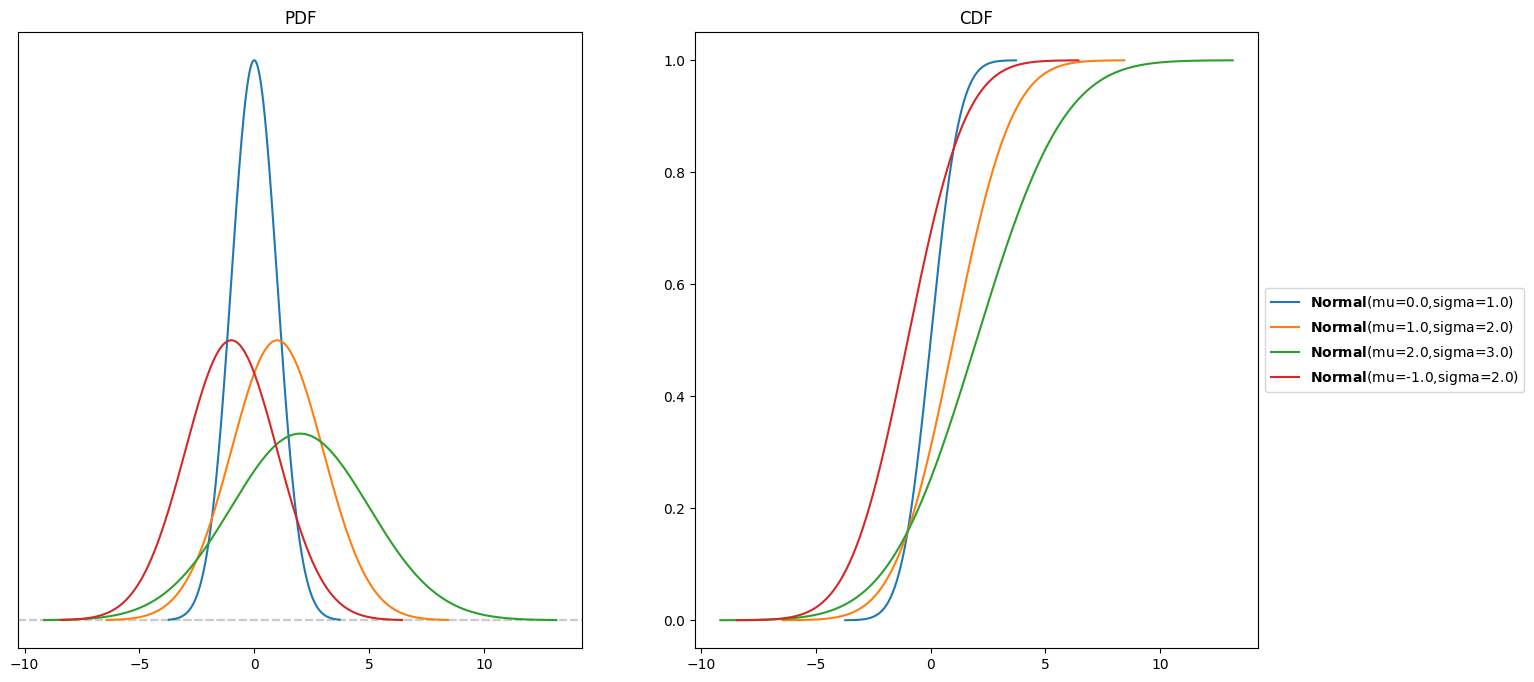

In [ ]:
parameters = [(0, 1), (1, 2), (2, 3),(-1,2)]
#create a figure with three subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
for mu,sigma in parameters:
  dist = pz.Normal(mu,sigma)
  dist.plot_pdf(ax=ax[0],legend=None)
  dist.plot_cdf(ax=ax[1])
  ax[0].set_title('PDF')
  ax[1].set_title('CDF')



interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

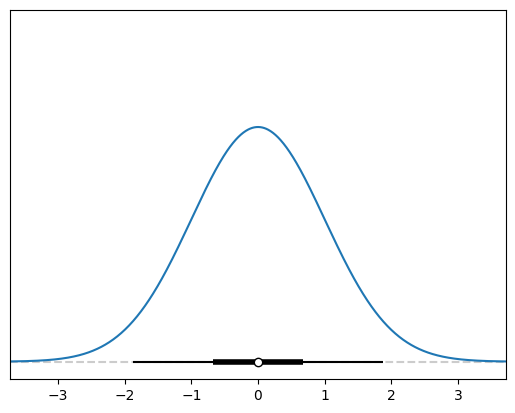

In [ ]:
pz.Normal(0,1).plot_interactive() #interactive plot

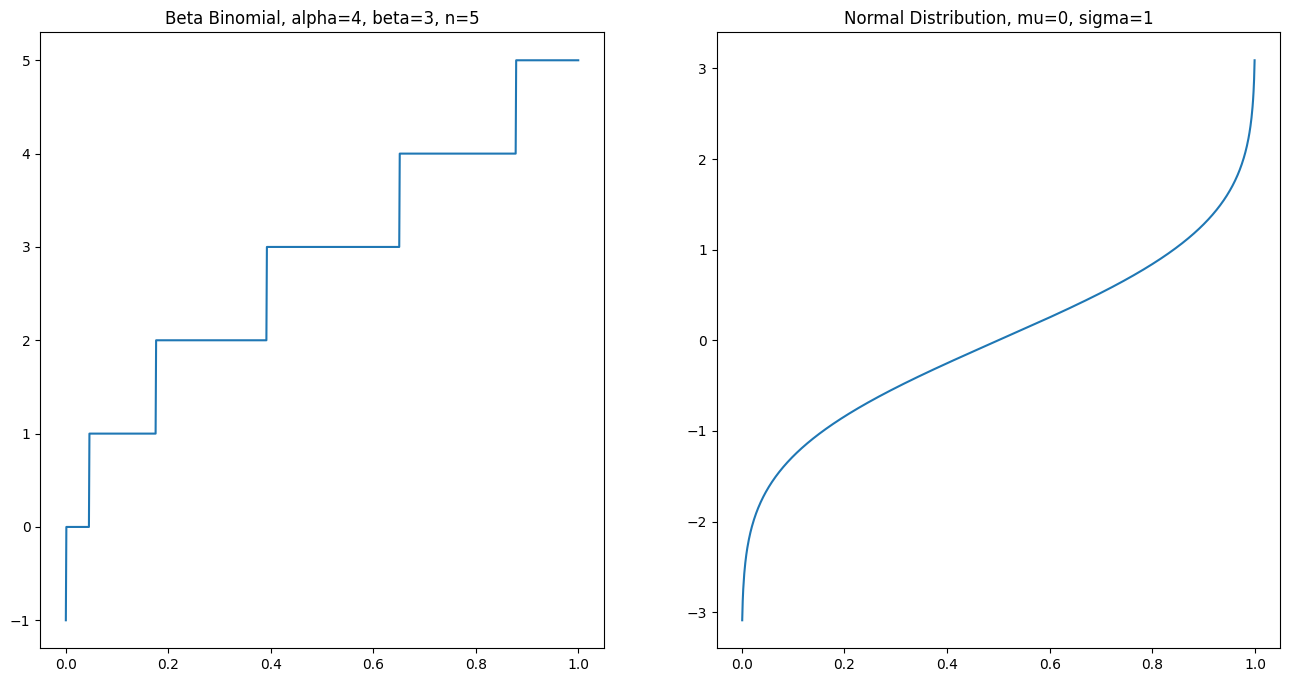

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
pz.BetaBinomial(alpha=4,beta=3,n=5).plot_ppf(ax=ax[0],legend=None)
pz.Normal(0,1).plot_ppf(ax=ax[1],legend=None)
ax[0].set_title(f"Beta Binomial, alpha=4, beta=3, n=5")
ax[1].set_title('Normal Distribution, mu=0, sigma=1')
plt.show()

The percentile Point function gives the value of the RV *X1* such that the probability of obtaining value of the RV less than or equal to *X1* is equal to the given input probability to the function. Upon looking at the plots and the definition of the function, it can be realised that it is nothing but the **inverse of CDF** function.

As for the relation between PDF and PPF, we know that the inverse of CDF is used to generate random variables pertaining to a certain distribution. So we can say that if we sample enough values from this function taking uniformly separated values between 0 and 1 as inputs, the frequency distribution of outputs will result in giving us a plot similar to the original PDF.  


Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

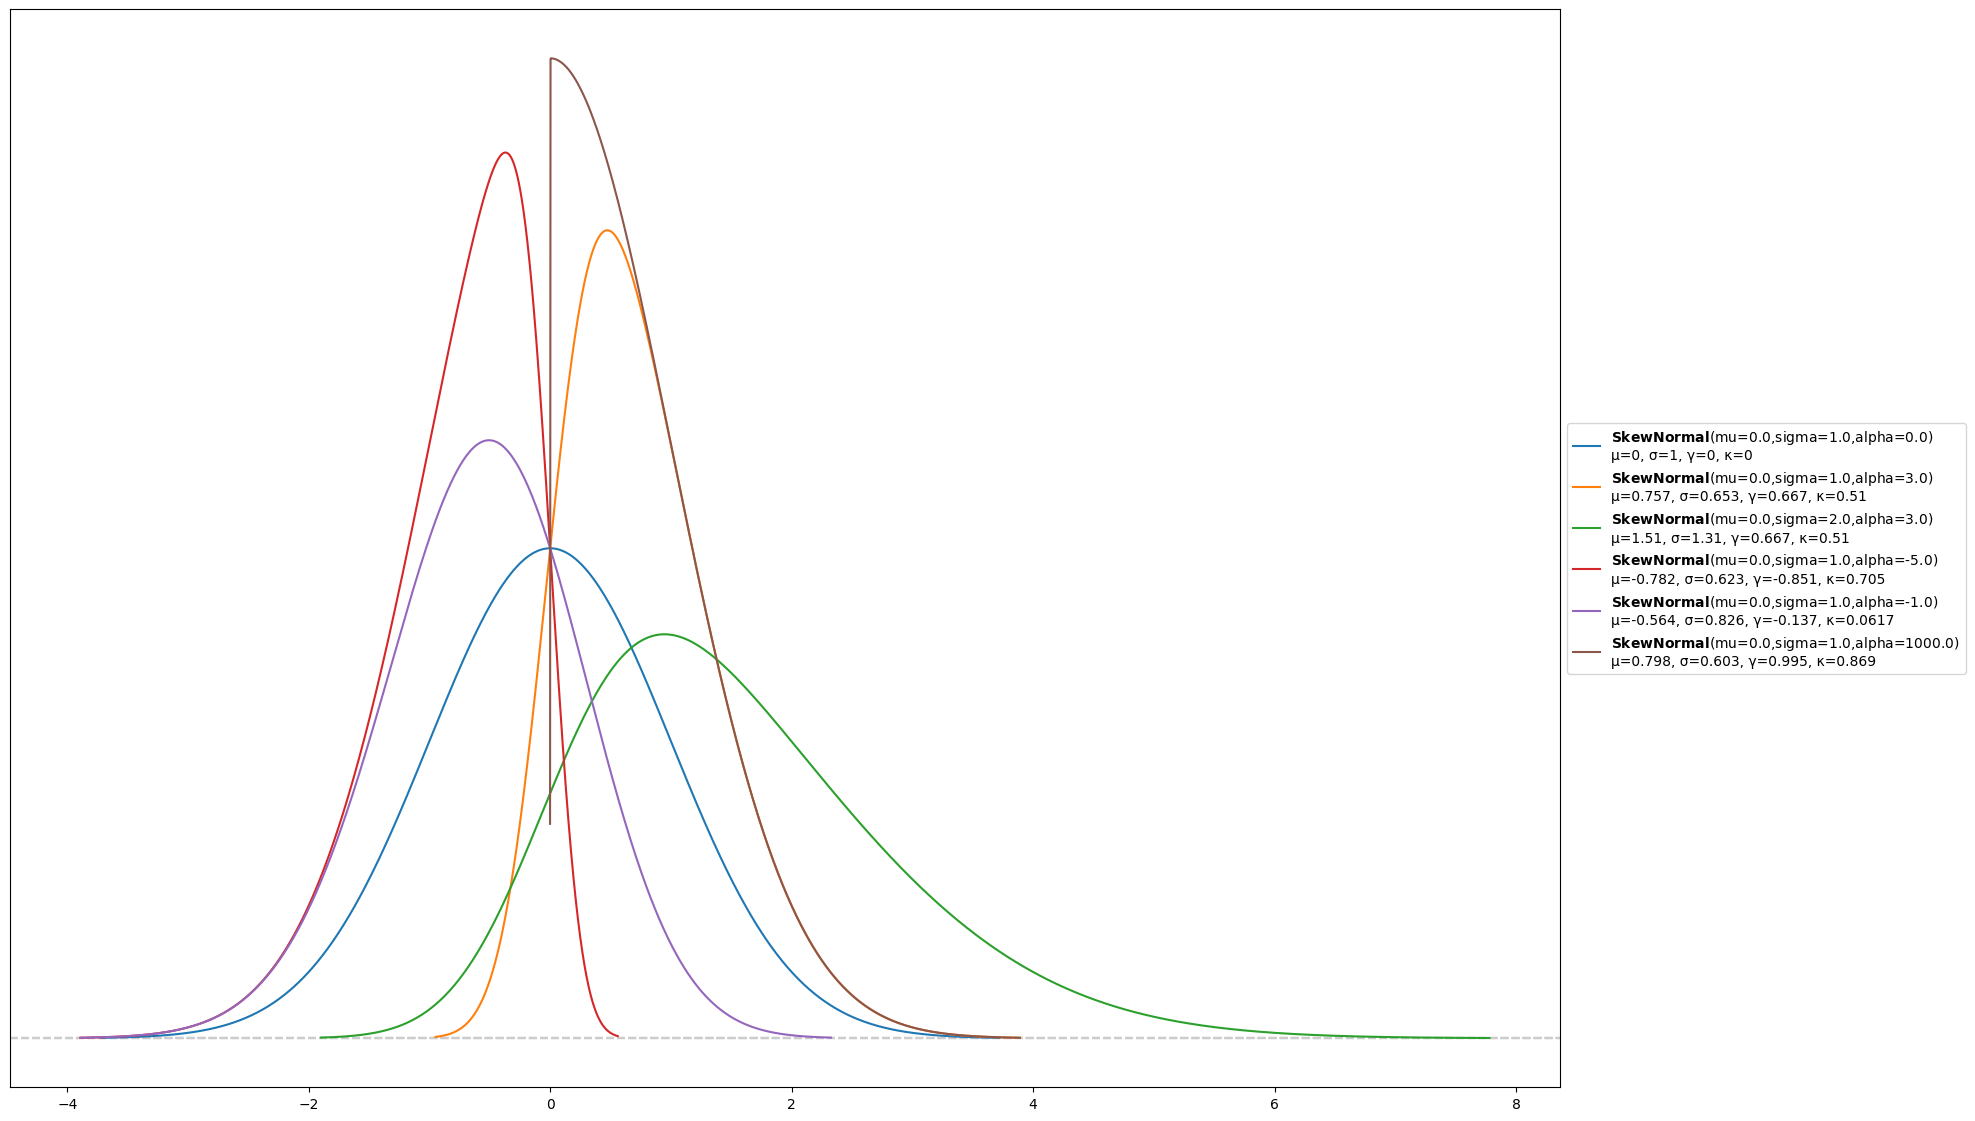

In [ ]:
plt.figure(figsize=(20,14))
pz.SkewNormal(0,1,0).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0,1,3).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0,2,3).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0,1,-5).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0,1,-1).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0,1,1e3).plot_pdf(moments=["m", "d", "s", "k"])
plt.show()


Here I didn't change mu as that just shifts the graph on x axis and has no other effect


In [ ]:
dist =  pz.SkewNormal(0,1,3)

#generate random samples of different sizes
sample1 = dist.rvs(10)
sample2 = dist.rvs(100)
sample3 = dist.rvs(1000)
sample4 = dist.rvs(10000)
#compute the mean and standard deviation of each sample
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
mean3 = np.mean(sample3)
mean4 = np.mean(sample4)
sd1 = np.std(sample1)
sd2 = np.std(sample2)
sd3 = np.std(sample3)
sd4 = np.std(sample4)
#print the mean and standard deviation of each sample
print("The results of the mean and standard devialtion on varying sample size are:")
results = {
 '10': [mean1,sd1],
 '100': [mean2,sd2],
 '1000': [mean3,sd3],
 '10000': [mean4,sd4],
 'actual': [0.757,0.653]
}
for key, value in results.items():
  print(f"{key}: {value}")




The results of the mean and standard devialtion on varying sample size are:
10: [0.6774869843605977, 0.8699114524548841]
100: [0.7653023184401408, 0.6393117178256168]
1000: [0.7802490827686822, 0.6838563641722675]
10000: [0.7572783082880791, 0.6518926864486505]
actual: [0.757, 0.653]
